In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 讀取 train.csv, test.csv 並將其合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
total = pd.concat([train, test], axis = 0)
print(train.shape, test.shape, total.shape)
total

(1095, 81) (365, 81) (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1327,30,RH,70.0,4270,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,79000
361,1154,30,RM,NaN,5890,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,120500
362,665,20,RL,49.0,20896,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,New,Partial,423000
363,1259,80,RL,59.0,9587,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,190000


## 分離目標

In [10]:
# 將目標分析欄位取出來
Lotfrontage = [total.LotFrontage]
GarageYrBlt = [total.GarageYrBlt]
MasVnrArea = [total.MasVnrArea]
Lotfrontage[0]
# filled with mean
Lotfrontage.append(Lotfrontage[0].fillna(Lotfrontage[0].mean()))
GarageYrBlt.append(GarageYrBlt[0].fillna(GarageYrBlt[0].mean()))
MasVnrArea.append(MasVnrArea[0].fillna(MasVnrArea[0].mean()))

# filled with median
Lotfrontage.append(Lotfrontage[0].fillna(Lotfrontage[0].median()))
GarageYrBlt.append(GarageYrBlt[0].fillna(GarageYrBlt[0].median()))
MasVnrArea.append(MasVnrArea[0].fillna(MasVnrArea[0].median()))

0      60.0
1      68.0
2      34.0
3      60.0
4      94.0
       ... 
360    70.0
361     NaN
362    49.0
363    59.0
364    84.0
Name: LotFrontage, Length: 1460, dtype: float64

## 繪圖

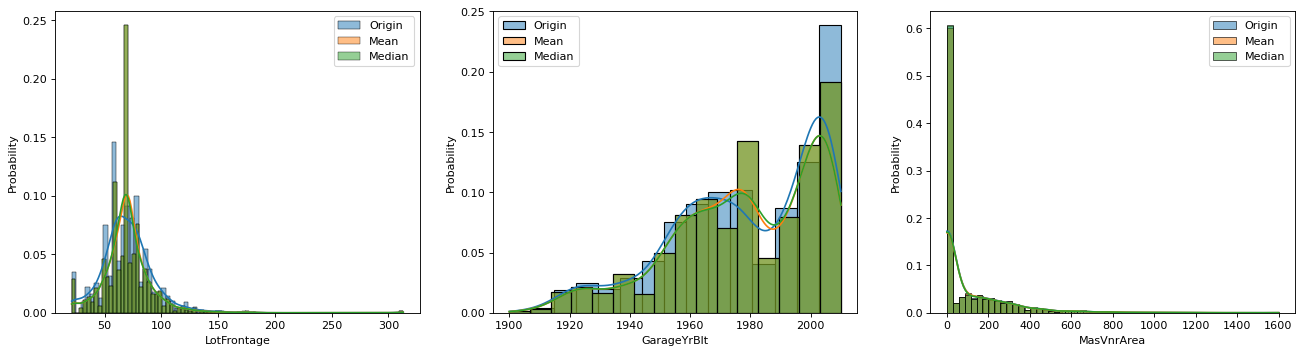

In [7]:
# 繪圖
label = ['Origin', 'Mean', 'Median']
color = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize = (20, 5), dpi = 80)
plt.subplot(1, 3, 1)
for i in range(3):
    sns.histplot(Lotfrontage[i], kde = True, stat = 'probability', element = 'bars', label = label[i], color = color[i])
plt.legend()

plt.subplot(1, 3, 2)
for i in range(3):
    sns.histplot(GarageYrBlt[i], kde = True, stat = 'probability', element = 'bars', label = label[i], color = color[i])
plt.legend()

plt.subplot(1, 3, 3)
for i in range(3):
    sns.histplot(MasVnrArea[i], kde = True, stat = 'probability', element = 'bars', label = label[i], color = color[i])
plt.legend()

plt.show()

## 分析標準差

In [11]:
for i in range(3):
    print(f'{label[i]}:')
    print(f'Lotfrontage: {Lotfrontage[i].std():.3f}, GarageYrBlt" {GarageYrBlt[i].std():.3f}, MasVnrArea: {MasVnrArea[i].std()}')
    print()

Origin:
Lotfrontage: 24.285, GarageYrBlt" 24.690, MasVnrArea: 181.0662065872166

Mean:
Lotfrontage: 22.024, GarageYrBlt" 23.995, MasVnrArea: 180.56911242597204

Median:
Lotfrontage: 22.028, GarageYrBlt" 23.997, MasVnrArea: 180.7313733581237



## 透過分析標準差可以得到什麼結果？
LotFrontage 有較多的缺失值(約缺失 17% 的資料)，故透過平均值及中位數填補具有較高的破壞性(標準差改變較多)